# ML Experiment-5

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer, load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC, SVR

from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingClassifier, StackingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import mean_squared_error, r2_score

Load Dataset

In [ ]:
cancer = load_breast_cancer()
diabetes = load_diabetes()

cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target

diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

In [ ]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Preprocess Dataset

In [ ]:
# Separate features (X) and targets (y) for classification
X_cls = cancer_df.drop('target', axis=1)
y_cls = cancer_df['target']

# Separate features (X) and targets (y) for regression
X_reg = diabetes_df.drop('target', axis=1)
y_reg = diabetes_df['target']


# Preprocess - Scale the features
scaler = StandardScaler()
X_cls_scaled = scaler.fit_transform(X_cls)
X_reg_scaled = scaler.fit_transform(X_reg)

# Display the first few rows of the preprocessed dataframes
print("Breast Cancer Data (scaled):")
display(pd.DataFrame(X_cls_scaled, columns=X_cls.columns).head())

print("\nDiabetes Data (scaled):")
display(pd.DataFrame(X_reg_scaled, columns=X_reg.columns).head())

Breast Cancer Data (scaled):


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100



Diabetes Data (scaled):


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


In [ ]:
# Train-test split and scaling for classification
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_cls_scaled, y_cls, test_size=0.2, random_state=42, stratify=y_cls)

# Train-test split and scaling for regression
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg_scaled, y_reg, test_size=0.2, random_state=42)

print("Preprocessing done.")

Preprocessing done.


Classification Models

In [ ]:
# Base learners
dt_clf = DecisionTreeClassifier(random_state=50)
lr_clf = LogisticRegression(max_iter=1000, random_state=50)
svc_clf = SVC(probability=True, random_state=50)

1. Bagging Classifier

In [ ]:
bagging_cls = BaggingClassifier(estimator=dt_clf, n_estimators=50, random_state=50)
bagging_cls.fit(Xc_train, yc_train)
bagging_pred = bagging_cls.predict(Xc_test)

# Evaluate Bagging Classifier
print("Bagging Classifier Metrics:")
print(f"Accuracy: {accuracy_score(yc_test, bagging_pred):.4f}")
print(f"Precision: {precision_score(yc_test, bagging_pred):.4f}")
print(f"Recall: {recall_score(yc_test, bagging_pred):.4f}")
print(f"F1-score: {f1_score(yc_test, bagging_pred):.4f}")

Bagging Classifier Metrics:
Accuracy: 0.9561
Precision: 0.9718
Recall: 0.9583
F1-score: 0.9650


2. Random Forest

In [ ]:
random_forest_cls = RandomForestClassifier(n_estimators=20, random_state=50)
random_forest_cls.fit(Xc_train, yc_train)
random_forest_pred = random_forest_cls.predict(Xc_test)

# Evaluate Random Forest Classifier
print("Random Forest Classifier Metrics:")
print(f"Accuracy: {accuracy_score(yc_test, random_forest_pred):.4f}")
print(f"Precision: {precision_score(yc_test, random_forest_pred):.4f}")
print(f"Recall: {recall_score(yc_test, random_forest_pred):.4f}")
print(f"F1-score: {f1_score(yc_test, random_forest_pred):.4f}")

Random Forest Classifier Metrics:
Accuracy: 0.9211
Precision: 0.9565
Recall: 0.9167
F1-score: 0.9362


3. AdaBoost/Gradient Boosting

In [ ]:
# AdaBoost Classifier
adaboost_cls = AdaBoostClassifier(n_estimators=50, random_state=50)
adaboost_cls.fit(Xc_train, yc_train)
adaboost_pred = adaboost_cls.predict(Xc_test)

# Evaluate AdaBoost Classifier
print("AdaBoost Classifier Metrics:")
print(f"Accuracy: {accuracy_score(yc_test, adaboost_pred):.4f}")
print(f"Precision: {precision_score(yc_test, adaboost_pred):.4f}")
print(f"Recall: {recall_score(yc_test, adaboost_pred):.4f}")
print(f"F1-score: {f1_score(yc_test, adaboost_pred):.4f}")

print("-" * 30)

# Gradient Boosting Classifier
gradient_boost_cls = GradientBoostingClassifier(n_estimators=50, random_state=50)
gradient_boost_cls.fit(Xc_train, yc_train)
gradient_boost_pred = gradient_boost_cls.predict(Xc_test)

# Evaluate Gradient Boosting Classifier
print("Gradient Boosting Classifier Metrics:")
print(f"Accuracy: {accuracy_score(yc_test, gradient_boost_pred):.4f}")
print(f"Precision: {precision_score(yc_test, gradient_boost_pred):.4f}")
print(f"Recall: {recall_score(yc_test, gradient_boost_pred):.4f}")
print(f"F1-score: {f1_score(yc_test, gradient_boost_pred):.4f}")

AdaBoost Classifier Metrics:
Accuracy: 0.9561
Precision: 0.9467
Recall: 0.9861
F1-score: 0.9660
------------------------------
Gradient Boosting Classifier Metrics:
Accuracy: 0.9474
Precision: 0.9459
Recall: 0.9722
F1-score: 0.9589


4. Voting Classifier

In [ ]:
# Voting Classifier
voting_cls = VotingClassifier(estimators=[('bagging', bagging_cls),
                                          ('random_forest', random_forest_cls),
                                          ('gradient_boosting', gradient_boost_cls),
                                          ('decision_tree', dt_clf)],
                                voting='hard')
voting_cls.fit(Xc_train, yc_train)
voting_pred = voting_cls.predict(Xc_test)

# Evaluate Voting Classifier
print("Voting Classifier Metrics:")
print(f"Accuracy: {accuracy_score(yc_test, voting_pred):.4f}")
print(f"Precision: {precision_score(yc_test, voting_pred):.4f}")
print(f"Recall: {recall_score(yc_test, voting_pred):.4f}")
print(f"F1-score: {f1_score(yc_test, voting_pred):.4f}")

Voting Classifier Metrics:
Accuracy: 0.9386
Precision: 0.9710
Recall: 0.9306
F1-score: 0.9504


5. Stacking Classifier

In [ ]:
# Stacking Classifier
stacking_cls = StackingClassifier(estimators=[('bagging', bagging_cls),
                                          ('random_forest', random_forest_cls),
                                          ('gradient_boosting', gradient_boost_cls),
                                          ('decision_tree', dt_clf)],
                                  final_estimator=lr_clf)
stacking_cls.fit(Xc_train, yc_train)
stacking_pred = stacking_cls.predict(Xc_test)

# Evaluate Stacking Classifier
print("Stacking Classifier Metrics:")
print(f"Accuracy: {accuracy_score(yc_test, stacking_pred):.4f}")
print(f"Precision: {precision_score(yc_test, stacking_pred):.4f}")
print(f"Recall: {recall_score(yc_test, stacking_pred):.4f}")
print(f"F1-score: {f1_score(yc_test, stacking_pred):.4f}")

Stacking Classifier Metrics:
Accuracy: 0.9386
Precision: 0.9452
Recall: 0.9583
F1-score: 0.9517


Comparison

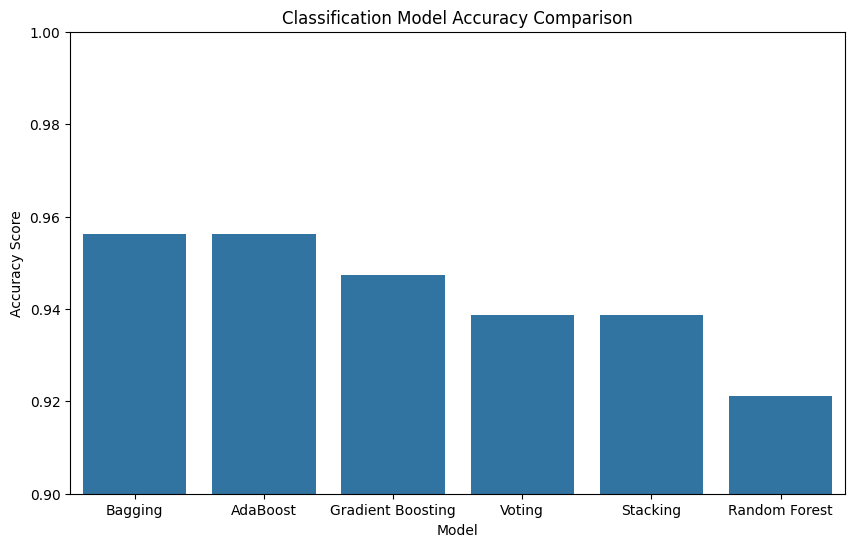

In [ ]:
model_accuracies = {
    'Bagging': accuracy_score(yc_test, bagging_pred),
    'Random Forest': accuracy_score(yc_test, random_forest_pred),
    'AdaBoost': accuracy_score(yc_test, adaboost_pred),
    'Gradient Boosting': accuracy_score(yc_test, gradient_boost_pred),
    'Voting': accuracy_score(yc_test, voting_pred),
    'Stacking': accuracy_score(yc_test, stacking_pred)
}

accuracy_series = pd.Series(model_accuracies)

accuracy_series = accuracy_series.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=accuracy_series.index, y=accuracy_series.values)
plt.title('Classification Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.ylim(0.9, 1.0)
plt.show()

Change Base Estimators

In [ ]:
# Bagging Classifier with Logistic Regression
bagging_lr = BaggingClassifier(estimator=lr_clf, n_estimators=50, random_state=50)
bagging_lr.fit(Xc_train, yc_train)
bagging_lr_pred = bagging_lr.predict(Xc_test)

# Evaluate Bagging Classifier with Logistic Regression
print("Bagging Classifier with Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_score(yc_test, bagging_lr_pred):.4f}")
print(f"Precision: {precision_score(yc_test, bagging_lr_pred):.4f}")
print(f"Recall: {recall_score(yc_test, bagging_lr_pred):.4f}")
print(f"F1-score: {f1_score(yc_test, bagging_lr_pred):.4f}")

print("-" * 30)

# Bagging Classifier with Decision Tree
bagging_dt = BaggingClassifier(estimator=dt_clf, n_estimators=50, random_state=50)
bagging_dt.fit(Xc_train, yc_train)
bagging_dt_pred = bagging_dt.predict(Xc_test)

# Evaluate Bagging Classifier with Decision Tree
print("Bagging Classifier with Decision Tree Metrics:")
print(f"Accuracy: {accuracy_score(yc_test, bagging_dt_pred):.4f}")
print(f"Precision: {precision_score(yc_test, bagging_dt_pred):.4f}")
print(f"Recall: {recall_score(yc_test, bagging_dt_pred):.4f}")
print(f"F1-score: {f1_score(yc_test, bagging_dt_pred):.4f}")

print("-" * 30)

# Bagging Classifier with SVM
bagging_svc = BaggingClassifier(estimator=svc_clf, n_estimators=50, random_state=50)
bagging_svc.fit(Xc_train, yc_train)
bagging_svc_pred = bagging_svc.predict(Xc_test)

# Evaluate Bagging Classifier with SVM
print("Bagging Classifier with SVM Metrics:")
print(f"Accuracy: {accuracy_score(yc_test, bagging_svc_pred):.4f}")
print(f"Precision: {precision_score(yc_test, bagging_svc_pred):.4f}")
print(f"Recall: {recall_score(yc_test, bagging_svc_pred):.4f}")
print(f"F1-score: {f1_score(yc_test, bagging_svc_pred):.4f}")

Bagging Classifier with Logistic Regression Metrics:
Accuracy: 0.9825
Precision: 0.9861
Recall: 0.9861
F1-score: 0.9861
------------------------------
Bagging Classifier with Decision Tree Metrics:
Accuracy: 0.9561
Precision: 0.9718
Recall: 0.9583
F1-score: 0.9650
------------------------------
Bagging Classifier with SVM Metrics:
Accuracy: 0.9737
Precision: 0.9859
Recall: 0.9722
F1-score: 0.9790


In [ ]:
# Voting Classifier with different base estimators
voting_lr_dt_svc = VotingClassifier(estimators=[('lr', lr_clf),
                                              ('dt', dt_clf),
                                              ('svc', svc_clf)],
                                   voting='hard')
voting_lr_dt_svc.fit(Xc_train, yc_train)
voting_lr_dt_svc_pred = voting_lr_dt_svc.predict(Xc_test)

# Evaluate Voting Classifier
print("Voting Classifier with LR, DT, and SVM Metrics:")
print(f"Accuracy: {accuracy_score(yc_test, voting_lr_dt_svc_pred):.4f}")
print(f"Precision: {precision_score(yc_test, voting_lr_dt_svc_pred):.4f}")
print(f"Recall: {recall_score(yc_test, voting_lr_dt_svc_pred):.4f}")
print(f"F1-score: {f1_score(yc_test, voting_lr_dt_svc_pred):.4f}")

Voting Classifier with LR, DT, and SVM Metrics:
Accuracy: 0.9825
Precision: 0.9861
Recall: 0.9861
F1-score: 0.9861


In [ ]:
# Stacking Classifier with different base estimators and Logistic Regression as final estimator
stacking_lr_dt_svc_lr = StackingClassifier(estimators=[('lr', lr_clf),
                                                     ('dt', dt_clf),
                                                     ('svc', svc_clf)],
                                          final_estimator=lr_clf)
stacking_lr_dt_svc_lr.fit(Xc_train, yc_train)
stacking_lr_dt_svc_lr_pred = stacking_lr_dt_svc_lr.predict(Xc_test)

# Evaluate Stacking Classifier
print("Stacking Classifier with LR, DT, and SVM (final estimator: LR) Metrics:")
print(f"Accuracy: {accuracy_score(yc_test, stacking_lr_dt_svc_lr_pred):.4f}")
print(f"Precision: {precision_score(yc_test, stacking_lr_dt_svc_lr_pred):.4f}")
print(f"Recall: {recall_score(yc_test, stacking_lr_dt_svc_lr_pred):.4f}")
print(f"F1-score: {f1_score(yc_test, stacking_lr_dt_svc_lr_pred):.4f}")

print("-" * 30)

# Stacking Classifier with different base estimators and Decision Tree as final estimator
stacking_lr_dt_svc_dt = StackingClassifier(estimators=[('lr', lr_clf),
                                                     ('dt', dt_clf),
                                                     ('svc', svc_clf)],
                                          final_estimator=dt_clf)
stacking_lr_dt_svc_dt.fit(Xc_train, yc_train)
stacking_lr_dt_svc_dt_pred = stacking_lr_dt_svc_dt.predict(Xc_test)

# Evaluate Stacking Classifier
print("Stacking Classifier with LR, DT, and SVM (final estimator: DT) Metrics:")
print(f"Accuracy: {accuracy_score(yc_test, stacking_lr_dt_svc_dt_pred):.4f}")
print(f"Precision: {precision_score(yc_test, stacking_lr_dt_svc_dt_pred):.4f}")
print(f"Recall: {recall_score(yc_test, stacking_lr_dt_svc_dt_pred):.4f}")
print(f"F1-score: {f1_score(yc_test, stacking_lr_dt_svc_dt_pred):.4f}")

print("-" * 30)

# Stacking Classifier with different base estimators and SVM as final estimator
stacking_lr_dt_svc_svc = StackingClassifier(estimators=[('lr', lr_clf),
                                                     ('dt', dt_clf),
                                                     ('svc', svc_clf)],
                                          final_estimator=svc_clf)
stacking_lr_dt_svc_svc.fit(Xc_train, yc_train)
stacking_lr_dt_svc_svc_pred = stacking_lr_dt_svc_svc.predict(Xc_test)

# Evaluate Stacking Classifier
print("Stacking Classifier with LR, DT, and SVM (final estimator: SVM) Metrics:")
print(f"Accuracy: {accuracy_score(yc_test, stacking_lr_dt_svc_svc_pred):.4f}")
print(f"Precision: {precision_score(yc_test, stacking_lr_dt_svc_svc_pred):.4f}")
print(f"Recall: {recall_score(yc_test, stacking_lr_dt_svc_svc_pred):.4f}")
print(f"F1-score: {f1_score(yc_test, stacking_lr_dt_svc_svc_pred):.4f}")

Stacking Classifier with LR, DT, and SVM (final estimator: LR) Metrics:
Accuracy: 0.9737
Precision: 0.9859
Recall: 0.9722
F1-score: 0.9790
------------------------------
Stacking Classifier with LR, DT, and SVM (final estimator: DT) Metrics:
Accuracy: 0.9649
Precision: 0.9595
Recall: 0.9861
F1-score: 0.9726
------------------------------
Stacking Classifier with LR, DT, and SVM (final estimator: SVM) Metrics:
Accuracy: 0.9737
Precision: 0.9859
Recall: 0.9722
F1-score: 0.9790


In [ ]:
all_cls_predictions = {
    'Bagging_DT': bagging_pred,
    'Random Forest': random_forest_pred,
    'AdaBoost': adaboost_pred,
    'Gradient Boosting': gradient_boost_pred,
    'Voting': voting_pred,
    'Stacking': stacking_pred,
    'Bagging_LR': bagging_lr_pred,
    'Bagging_SVM': bagging_svc_pred,
    'Voting_LR_DT_SVM': voting_lr_dt_svc_pred,
    'Stacking_LR_DT_SVM_LR': stacking_lr_dt_svc_lr_pred,
    'Stacking_LR_DT_SVM_DT': stacking_lr_dt_svc_dt_pred,
    'Stacking_LR_DT_SVM_SVM': stacking_lr_dt_svc_svc_pred,
}

classification_metrics = {}

for model_name, predictions in all_cls_predictions.items():
    classification_metrics[model_name] = {
        'Accuracy': accuracy_score(yc_test, predictions),
        'Precision': precision_score(yc_test, predictions),
        'Recall': recall_score(yc_test, predictions),
        'F1-score': f1_score(yc_test, predictions),
    }

metrics_df = pd.DataFrame(classification_metrics).T
print("Classification Model Performance Metrics:")
display(metrics_df.sort_values(by='Accuracy', ascending=False))

Classification Model Performance Metrics:


,Accuracy,Precision,Recall,F1-score
Voting_LR_DT_SVM,0.982456,0.986111,0.986111,0.986111
Bagging_LR,0.982456,0.986111,0.986111,0.986111
Bagging_SVM,0.973684,0.985915,0.972222,0.979021
Stacking_LR_DT_SVM_LR,0.973684,0.985915,0.972222,0.979021
Stacking_LR_DT_SVM_SVM,0.973684,0.985915,0.972222,0.979021
Stacking_LR_DT_SVM_DT,0.964912,0.959459,0.986111,0.972603
AdaBoost,0.956140,0.946667,0.986111,0.965986
Bagging_DT,0.956140,0.971831,0.958333,0.965035
Gradient Boosting,0.947368,0.945946,0.972222,0.958904
Voting,0.938596,0.971014,0.930556,0.950355


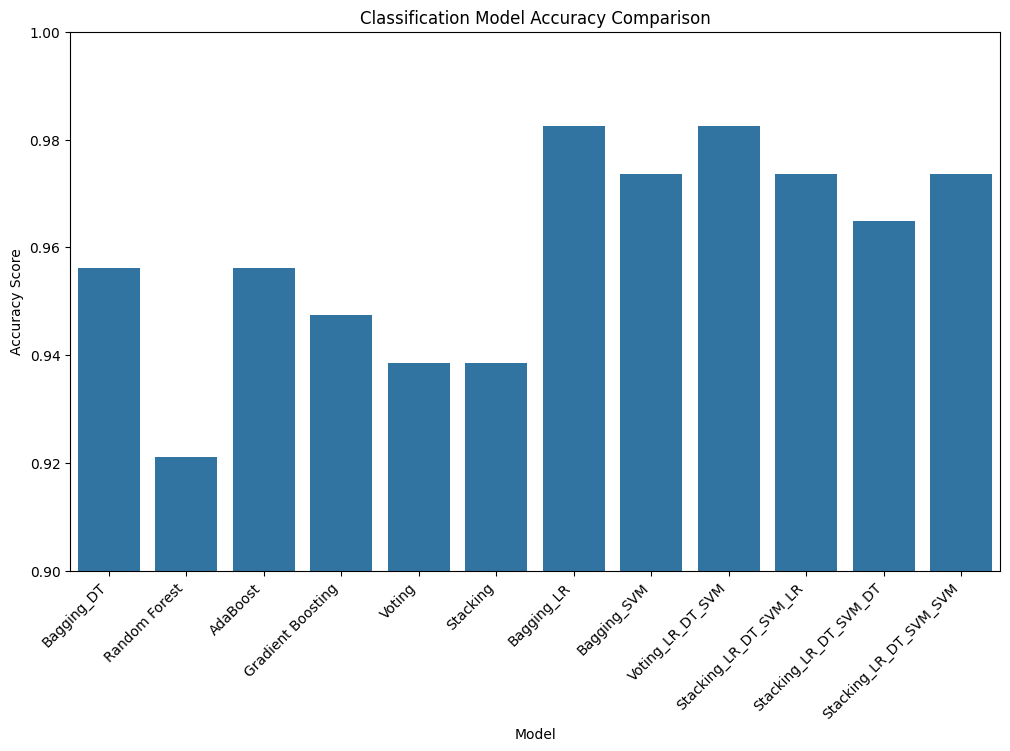

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x=metrics_df.index, y=metrics_df['Accuracy'])
plt.title('Classification Model Accuracy Comparison')
plt.ylabel('Accuracy Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.9, 1.0)
plt.show()

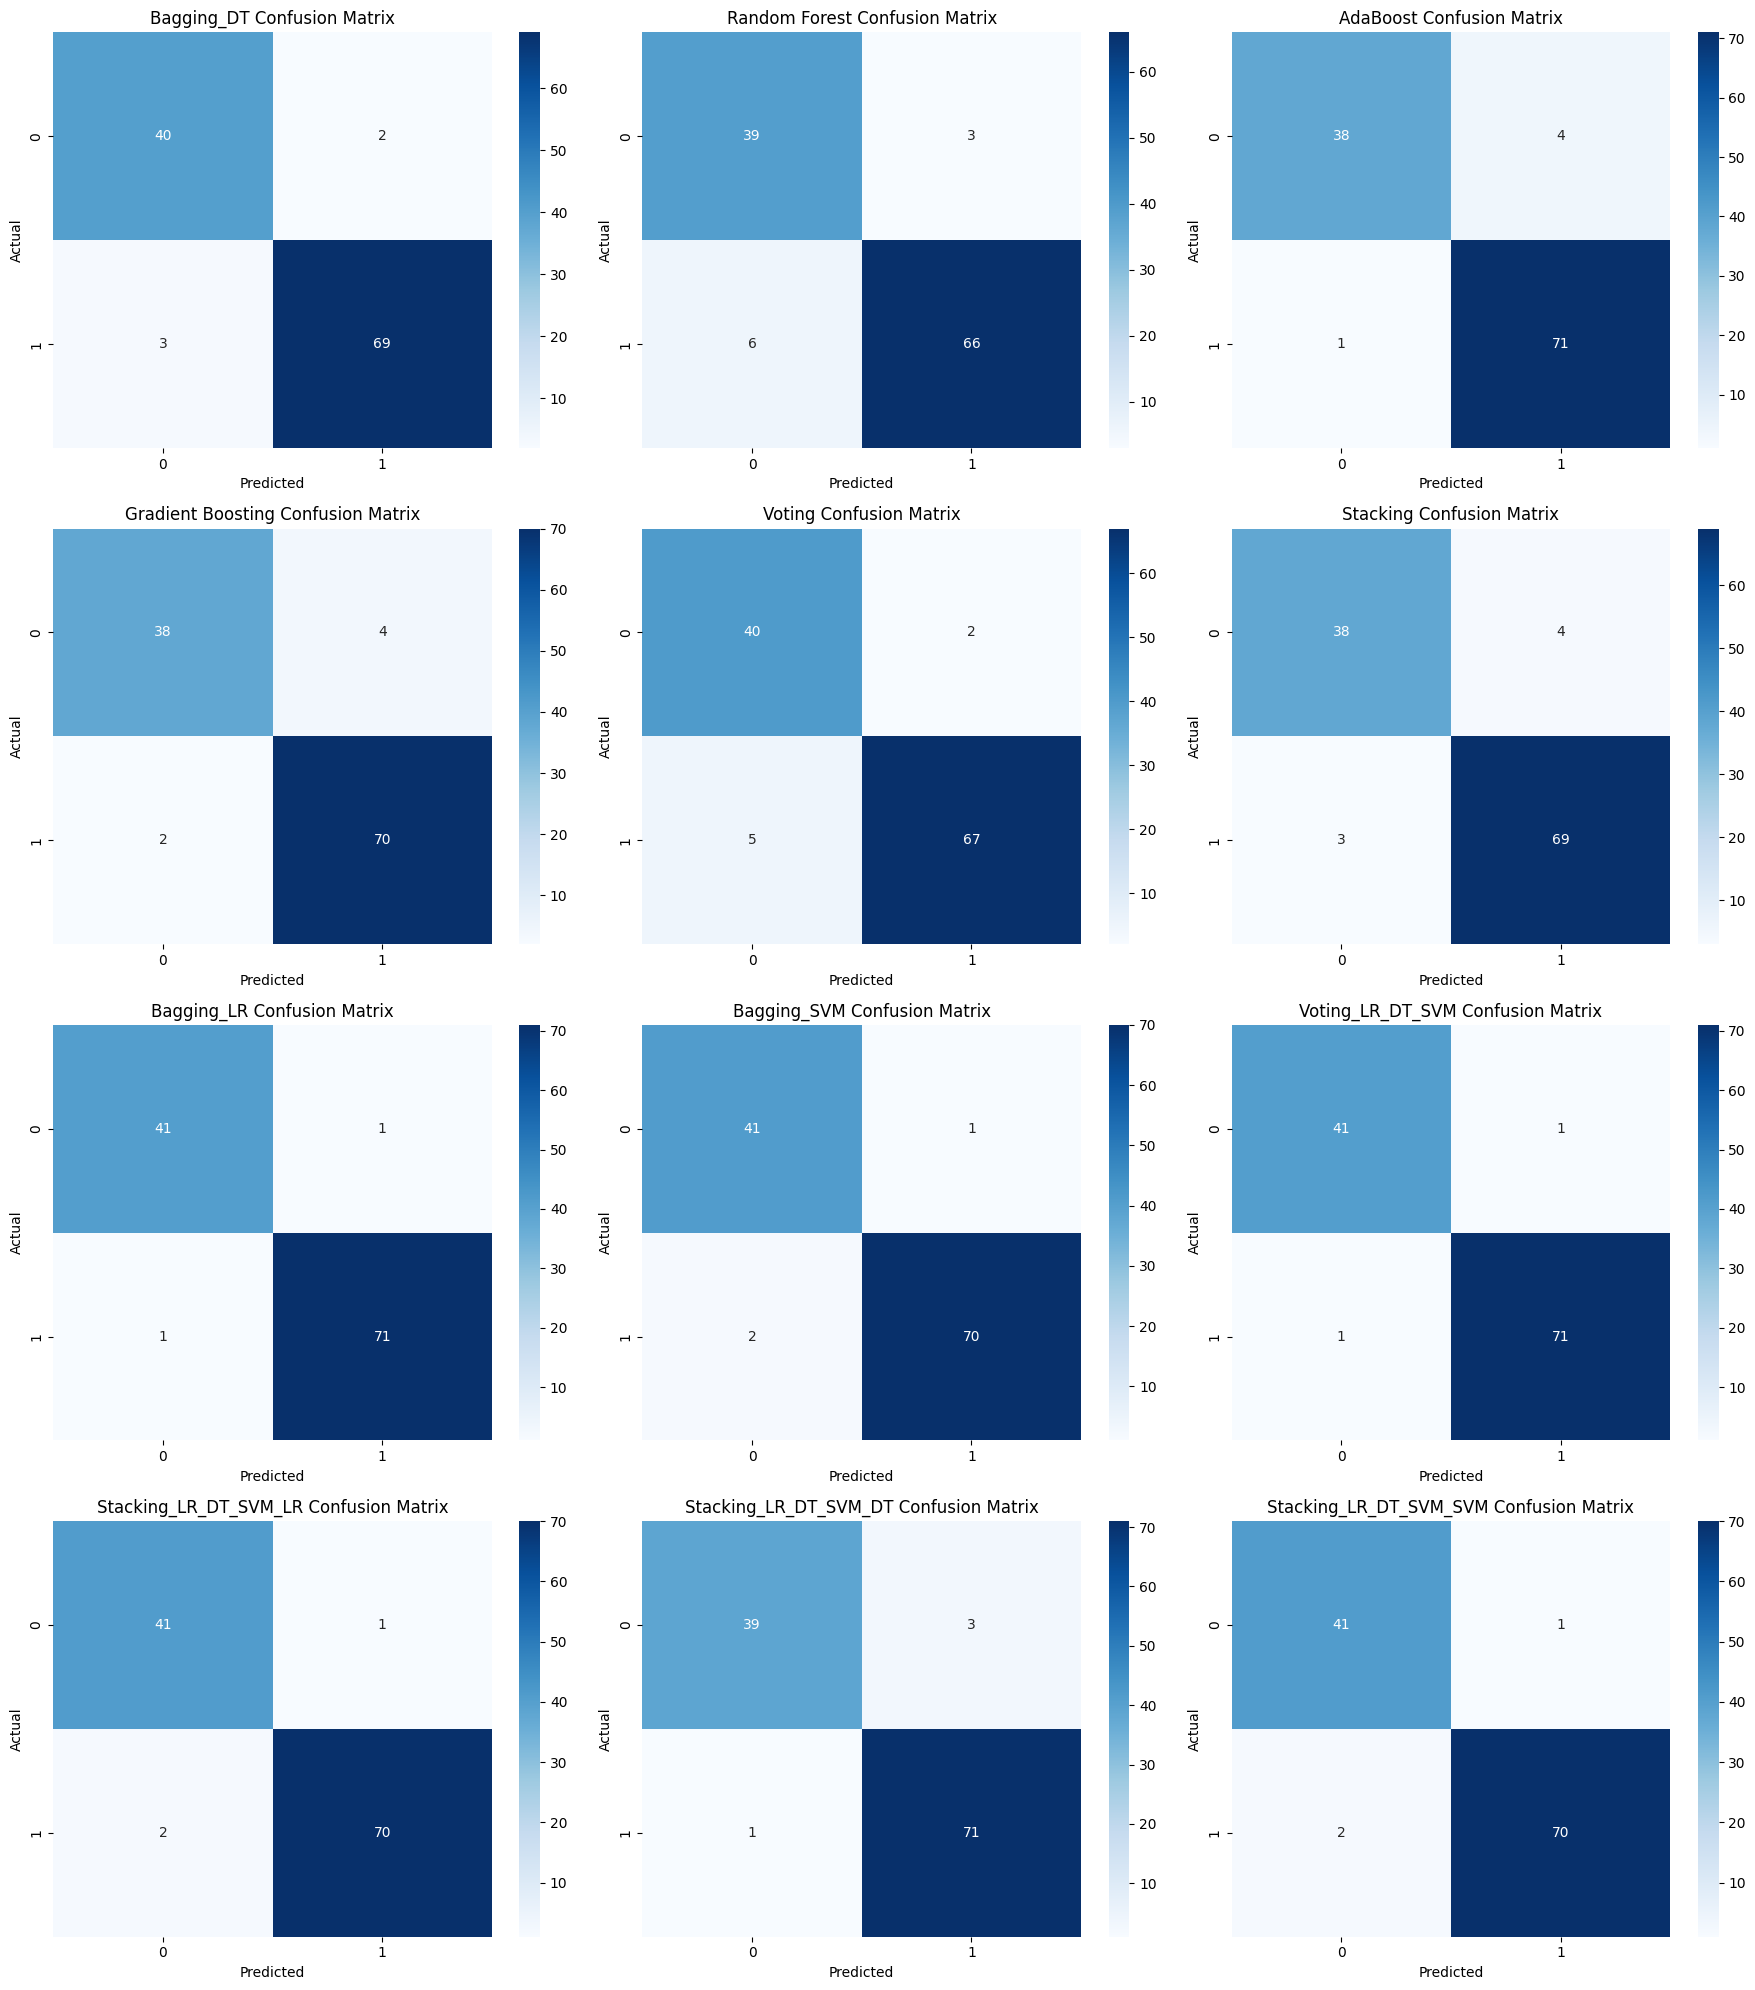

In [ ]:
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()

for i, (model_name, predictions) in enumerate(all_cls_predictions.items()):
    cm = confusion_matrix(yc_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model_name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()

Regressors

In [ ]:
dt_reg = DecisionTreeRegressor(random_state=50)
lr_reg = LinearRegression()

1. Bagging Regressor

In [ ]:
bagging_reg = BaggingRegressor(estimator=lr_reg, n_estimators=50, random_state=50)
bagging_reg.fit(Xr_train, yr_train)
bagging_reg_pred = bagging_reg.predict(Xr_test)

# Evaluate Bagging Regressor
print("Bagging Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mean_squared_error(yr_test, bagging_reg_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(yr_test, bagging_reg_pred)):.4f}")
print(f"R-squared (R2): {r2_score(yr_test, bagging_reg_pred):.4f}")

Bagging Regressor Metrics:
Mean Squared Error (MSE): 2872.7319
Root Mean Squared Error (RMSE): 53.5979
R-squared (R2): 0.4578


2. Random Forest Regressor

In [ ]:
random_forest_reg = RandomForestRegressor(n_estimators=50, random_state=50)
random_forest_reg.fit(Xr_train, yr_train)
random_forest_reg_pred = random_forest_reg.predict(Xr_test)

# Evaluate Random Forest Regressor
print("Random Forest Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mean_squared_error(yr_test, random_forest_reg_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(yr_test, random_forest_reg_pred)):.4f}")
print(f"R-squared (R2): {r2_score(yr_test, random_forest_reg_pred):.4f}")

Random Forest Regressor Metrics:
Mean Squared Error (MSE): 2866.1920
Root Mean Squared Error (RMSE): 53.5368
R-squared (R2): 0.4590


3. Gradient Boosting Regressor

In [ ]:
gradient_boost_reg = GradientBoostingRegressor(n_estimators=50, random_state=50)
gradient_boost_reg.fit(Xr_train, yr_train)
gradient_boost_reg_pred = gradient_boost_reg.predict(Xr_test)

# Evaluate Gradient Boosting Regressor
print("Gradient Boosting Regressor Metrics:")
print(f"Mean Squared Error (MSE): {mean_squared_error(yr_test, gradient_boost_reg_pred):.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(mean_squared_error(yr_test, gradient_boost_reg_pred)):.4f}")
print(f"R-squared (R2): {r2_score(yr_test, gradient_boost_reg_pred):.4f}")

Gradient Boosting Regressor Metrics:
Mean Squared Error (MSE): 2848.3401
Root Mean Squared Error (RMSE): 53.3698
R-squared (R2): 0.4624


In [ ]:
regression_metrics = {
    'Bagging Regressor': {
        'MSE': mean_squared_error(yr_test, bagging_reg_pred),
        'RMSE': np.sqrt(mean_squared_error(yr_test, bagging_reg_pred)),
        'R2': r2_score(yr_test, bagging_reg_pred)
    },
    'Random Forest Regressor': {
        'MSE': mean_squared_error(yr_test, random_forest_reg_pred),
        'RMSE': np.sqrt(mean_squared_error(yr_test, random_forest_reg_pred)),
        'R2': r2_score(yr_test, random_forest_reg_pred)
    },
    'Gradient Boosting Regressor': {
        'MSE': mean_squared_error(yr_test, gradient_boost_reg_pred),
        'RMSE': np.sqrt(mean_squared_error(yr_test, gradient_boost_reg_pred)),
        'R2': r2_score(yr_test, gradient_boost_reg_pred)
    }
}

metrics_reg_df = pd.DataFrame(regression_metrics).T
print("Regression Model Performance Metrics:")
display(metrics_reg_df.sort_values(by='R2', ascending=False))

Regression Model Performance Metrics:


,MSE,RMSE,R2
Gradient Boosting Regressor,2848.340084,53.369842,0.462390
Random Forest Regressor,2866.192018,53.536829,0.459020
Bagging Regressor,2872.731942,53.597873,0.457786


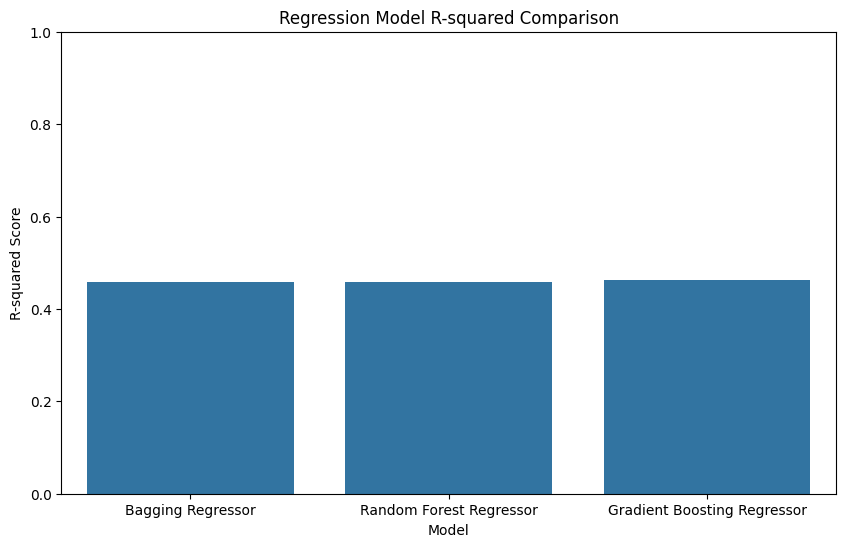

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_reg_df.index, y=metrics_reg_df['R2'])
plt.title('Regression Model R-squared Comparison')
plt.ylabel('R-squared Score')
plt.xlabel('Model')
plt.ylim(0, 1.0)
plt.show()